<a href="https://colab.research.google.com/github/Raissa-hue310/Project-4-Unsupervised-Image/blob/main/Project4_Unsupervised_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Unsupervised Image Clustering and Visualization
## Course: Data Analytics and Business Intelligence Analyst

## Student: Raissa Matho Mekjele

Section 1: Data Preparation and Exploration

In [1]:
# Imports Librairies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
# Load MNIST-like digits dataset from scikit-learn
digits = load_digits()

X = digits.data        # Flattened images shape (n_samples, 64)
y = digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


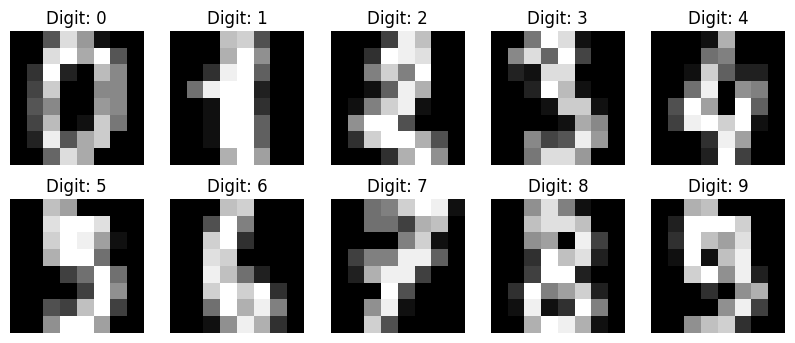

In [3]:
# Visualize a few samples images

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis("off")
plt.show()


In [4]:
# Normalize the data
# K-Means requires comparable feature scales.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape


(1797, 64)

/tmp/ipython-input-1234065585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


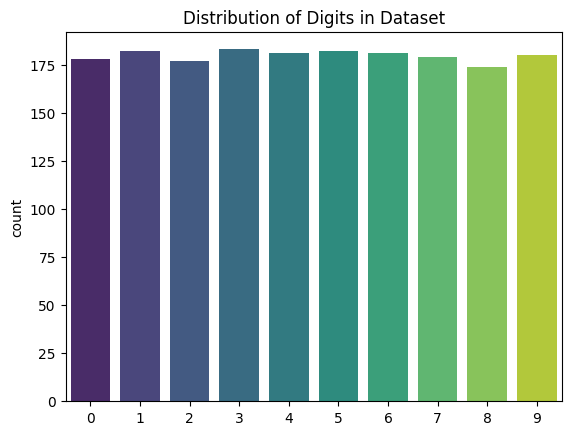

In [5]:
# Basic Exploratory Data Analysis

sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Digits in Dataset")
plt.show()


# SECTION 2 — K-Means Clustering
## Elbow Method to Find Optimal Number of Clusters

We will test k = 2 to k = 15 and compute inertia (distortion).


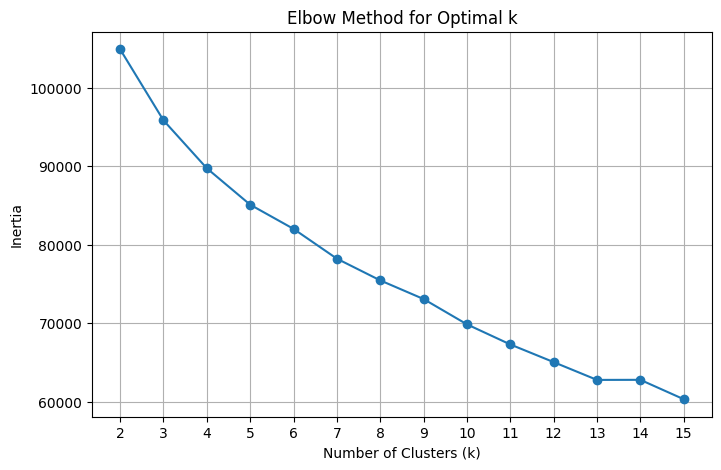

In [6]:
inertia = []
K = range(2, 16)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xticks(K)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


The “elbow” usually appears around k = 10, matching the 10 digits of MNIST, but we allow the graph to guide us.
## Fit Final K-Means Model (k = 10)

In [7]:
k_optimal = 10

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_


## Add cluster labels to dataset

In [8]:
# Useful for analysis later
cluster_labels[:20]


array([5, 9, 9, 7, 2, 7, 4, 3, 9, 7, 5, 2, 6, 7, 2, 1, 4, 3, 9, 7],
      dtype=int32)

# SECTION 3 — Cluster Centroid Visualization

K-Means centroids are 64-dimensional vectors (8×8 pixel images).
We can visualize them as “average digit images”.

## Visualize Centroids as Images

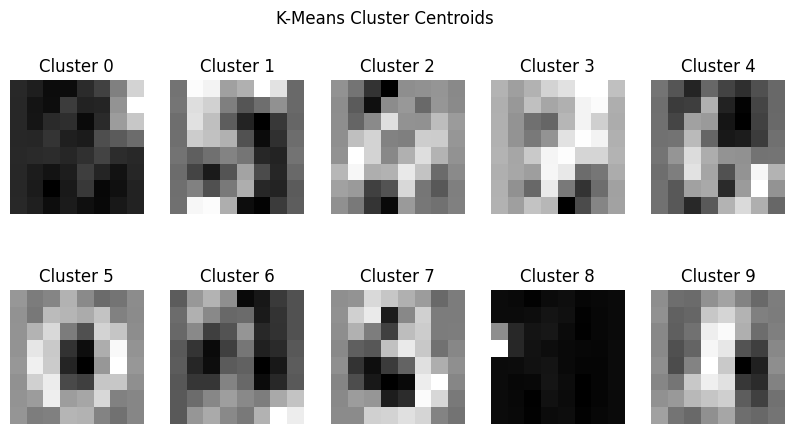

In [9]:
centroids = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Cluster {i}")
    ax.axis("off")

plt.suptitle("K-Means Cluster Centroids")
plt.show()


This gives a powerful visual representation of:

- Which clusters resemble 0,1,2,…

- Variants within digits

- “Blurry average” patterns

# SECTION 4 — Assign Clusters to New Images (Prediction)

This meets the requirement:

Demonstrate how to use the trained model to assign clusters to new image data instances.

## Predict on New Samples

Use first 10 images as an example:

In [10]:
new_samples = X_scaled[:10]  # First 10 images
new_clusters = kmeans.predict(new_samples)

print("Predicted cluster labels:", new_clusters)


Predicted cluster labels: [5 9 9 7 2 7 4 3 9 7]


## Visualize Predictions

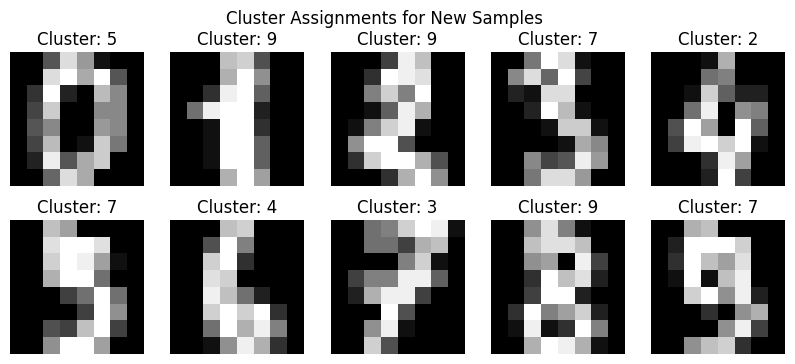

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Cluster: {new_clusters[i]}")
    ax.axis("off")

plt.suptitle("Cluster Assignments for New Samples")
plt.show()


# SECTION 4 — PCA and t-SNE Visualization

We will:

- Reduce MNIST to 2D using PCA
- Visualize raw PCA clusters
- Reduce MNIST to 2D using t-SNE (high-quality nonlinear embedding)
- Visualize K-Means clusters on both PCA and t-SNE

In [12]:
# PCA projection to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA shape:", X_pca.shape)


PCA shape: (1797, 2)


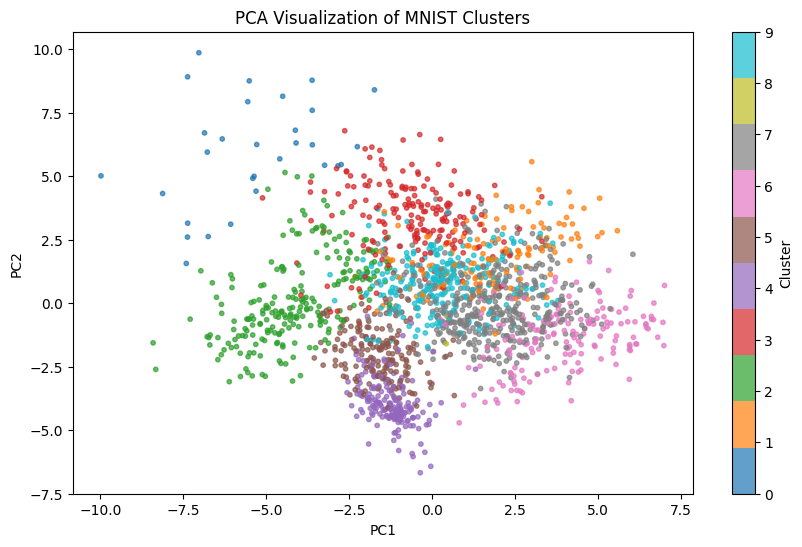

In [13]:
# PCA Visualization Colored by Cluster Labels

plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_labels,
    cmap="tab10",
    s=10,
    alpha=0.7
)

plt.title("PCA Visualization of MNIST Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [14]:
# t-SNE (2 Components)
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    learning_rate=200
)

X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE shape:", X_tsne.shape)


t-SNE shape: (1797, 2)


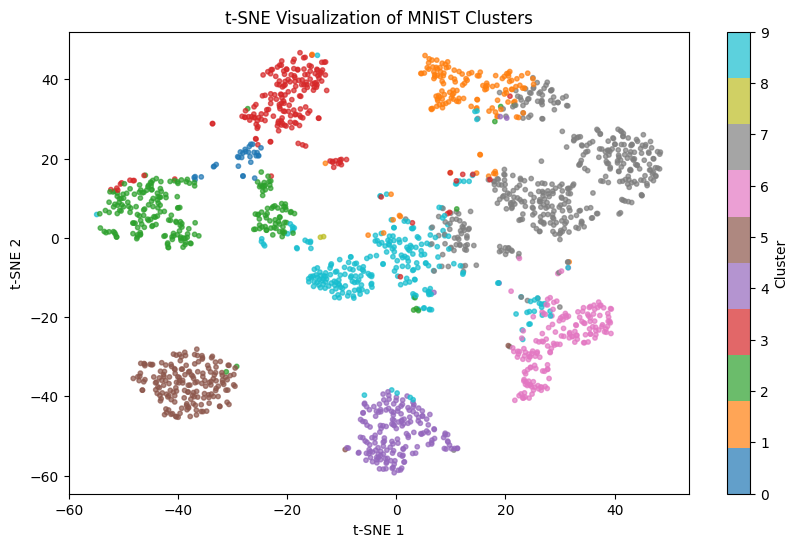

In [15]:
# t-SNE Visualization Colored by Cluster Labels
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=cluster_labels,
    cmap="tab10",
    s=10,
    alpha=0.7
)

plt.title("t-SNE Visualization of MNIST Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster")
plt.show()


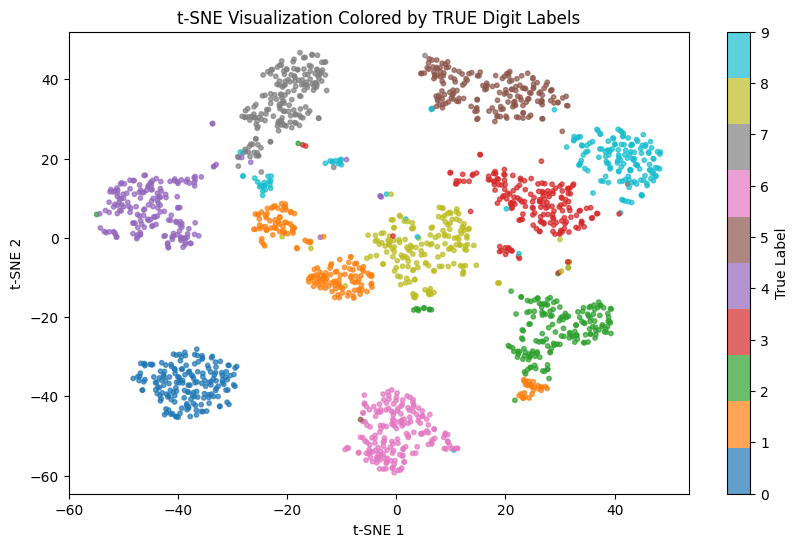

In [16]:
# Compare Clusters to True Labels (Unsupervised Evaluation)
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=y,                   # true labels
    cmap="tab10",
    s=10,
    alpha=0.7
)

plt.title("t-SNE Visualization Colored by TRUE Digit Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="True Label")
plt.show()
